<a href="https://colab.research.google.com/github/dmitryplus/otus_llm_develop_dz/blob/main/hw1_attention_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ №1: Визуализация механизмов Attention в трансформерах

## 🎯 Цель задания
После выполнения задания вы сможете:
- Визуализировать работу self-attention механизма
- Сравнивать различные реализации QKV в BERT, GPT и T5
- Анализировать позиционные векторы и их влияние на понимание последовательности
- Интерпретировать attention-карты для объяснения решений модели

## 📝 Структура задания
- **Часть 1** (обязательная, 70% оценки): Базовая визуализация attention
- **Часть 2** (дополнительная, 30% оценки): Продвинутый анализ

## ⚡ Критерии оценки
- Корректность кода: 40%
- Качество визуализации: 30%
- Анализ результатов: 30%


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import (
    AutoTokenizer, AutoModel,
    BertTokenizer, BertModel,
    GPT2Tokenizer, GPT2Model,
    T5Tokenizer, T5Model
)
from bertviz import model_view, head_view
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline


## 📊 Часть 1: Основные задания (обязательная часть)

### Задание 1.1: Загрузка и подготовка моделей


In [9]:
# Загружаем модели для сравнения
models_info = {
    'BERT': {
        'model_name': 'bert-base-uncased',
        'tokenizer': None,
        'model': None
    },
    'GPT-2': {
        'model_name': 'gpt2',
        'tokenizer': None,
        'model': None
    }
}

models_info['BERT']['tokenizer'] = BertTokenizer.from_pretrained(models_info['BERT']['model_name'])
models_info['BERT']['model'] = BertModel.from_pretrained(models_info['BERT']['model_name'], output_attentions=True)

models_info['GPT-2']['tokenizer'] = GPT2Tokenizer.from_pretrained(models_info['GPT-2']['model_name'])
models_info['GPT-2']['model'] = GPT2Model.from_pretrained(models_info['GPT-2']['model_name'], output_attentions=True)


print("Модели загружены успешно!")


Модели загружены успешно!


### Задание 1.2: Токенизация и получение attention весов

In [11]:
# Тестовый текст для анализа
test_text = "The cat sat on the mat and looked at the dog."
print(f"Анализируемый текст: {test_text}")


def get_attention_weights(text, model_name):
    """
    Получение attention весов для заданного текста и модели
    """
    tokenizer = models_info[model_name]['tokenizer']

    inputs = tokenizer(text, return_tensors='pt')

    tokens = tokenizer.tokenize(text)


    model = models_info[model_name]['model']

    with torch.no_grad():
        outputs = model(**inputs)
        attention_weights = outputs.attentions

    return attention_weights, tokens, inputs

# Получаем attention веса для обеих моделей
bert_attention, bert_tokens, bert_inputs = get_attention_weights(test_text, 'BERT')
gpt2_attention, gpt2_tokens, gpt2_inputs = get_attention_weights(test_text, 'GPT-2')

print(f"BERT tokens: {bert_tokens}")
print(f"GPT-2 tokens: {gpt2_tokens}")
print(f"BERT attention shape: {bert_attention[0].shape}")
print(f"GPT-2 attention shape: {gpt2_attention[0].shape}")


Анализируемый текст: The cat sat on the mat and looked at the dog.
BERT tokens: ['the', 'cat', 'sat', 'on', 'the', 'mat', 'and', 'looked', 'at', 'the', 'dog', '.']
GPT-2 tokens: ['The', 'Ġcat', 'Ġsat', 'Ġon', 'Ġthe', 'Ġmat', 'Ġand', 'Ġlooked', 'Ġat', 'Ġthe', 'Ġdog', '.']
BERT attention shape: torch.Size([1, 12, 14, 14])
GPT-2 attention shape: torch.Size([1, 12, 12, 12])


### Задание 1.3: Создание базовой attention heatmap

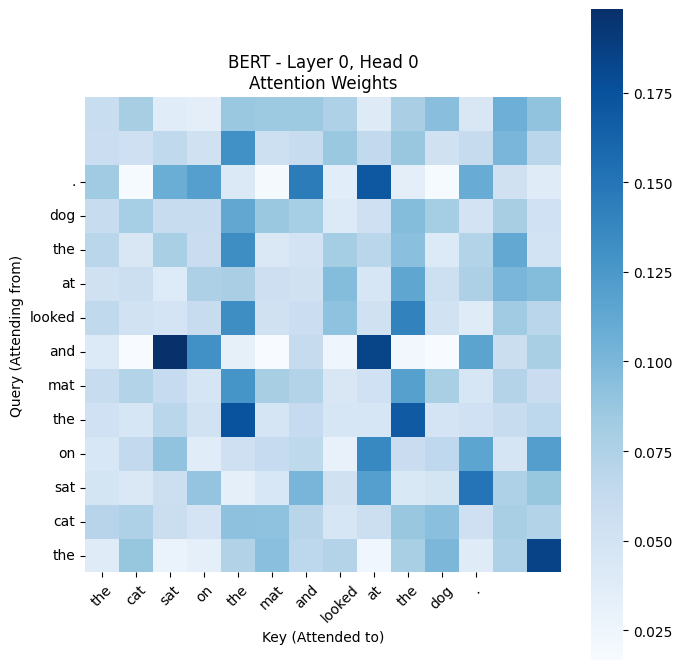

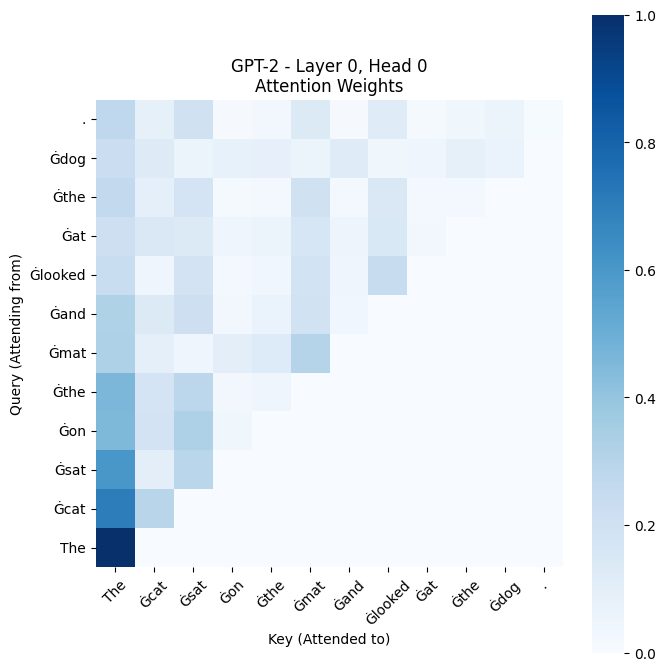

layer_idx=1, head_idx=0


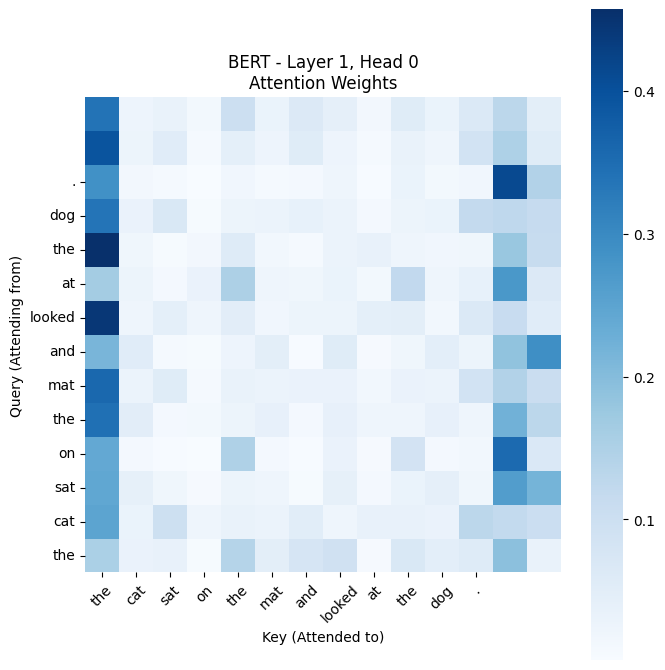

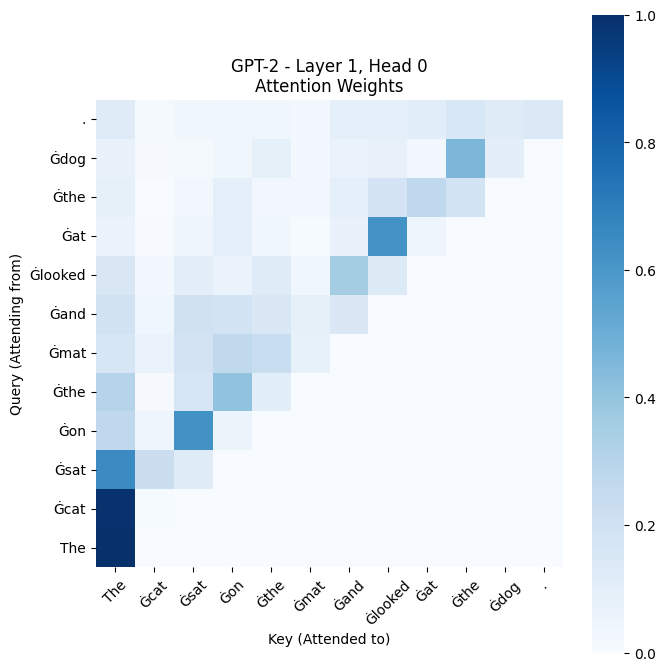

layer_idx=2, head_idx=0


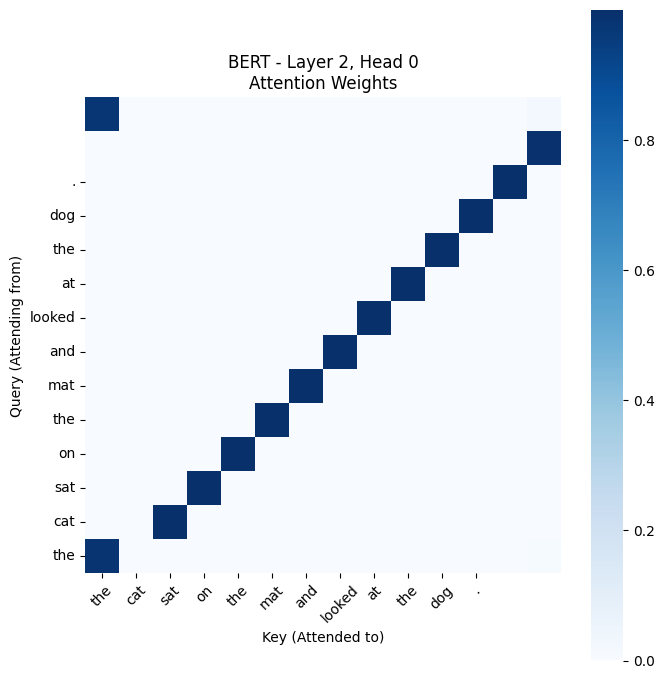

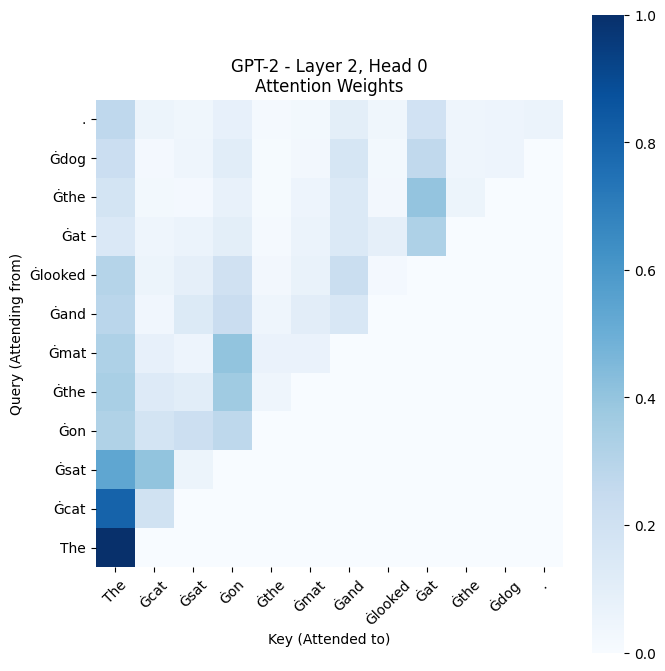

In [28]:
def plot_attention_heatmap(attention_weights, tokens, model_name, layer_idx=0, head_idx=0):
    """
    Создание heatmap для визуализации attention весов
    """
    # TODO: Извлеките attention веса для указанного слоя и головы
    attention_matrix = attention_weights[layer_idx][0, head_idx].detach().numpy()

    # ToDo: Создаем heatmap



    # TODO: Созданиее heatmap используя seaborn ( можно использовать другие библиотеки)
    # основная задача - визуализировать веса на каждый токен ( слово )
    plt.figure(figsize=(7, 7))
    ax = sns.heatmap(
       attention_matrix,
       xticklabels=tokens,
       yticklabels=tokens,
       cmap='Blues',
       cbar=True,
       square=True
    )

    plt.title(f'{model_name} - Layer {layer_idx}, Head {head_idx}\nAttention Weights')
    plt.xlabel('Key (Attended to)')
    plt.ylabel('Query (Attending from)')

    ax.invert_yaxis()

    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Визуализируем attention для первого слоя и первой головы
plot_attention_heatmap(bert_attention, bert_tokens, 'BERT', layer_idx=0, head_idx=0)
plot_attention_heatmap(gpt2_attention, gpt2_tokens, 'GPT-2', layer_idx=0, head_idx=0)

print(f'layer_idx=1, head_idx=0')

plot_attention_heatmap(bert_attention, bert_tokens, 'BERT', layer_idx=1, head_idx=0)
plot_attention_heatmap(gpt2_attention, gpt2_tokens, 'GPT-2', layer_idx=1, head_idx=0)

print(f'layer_idx=2, head_idx=0')

plot_attention_heatmap(bert_attention, bert_tokens, 'BERT', layer_idx=2, head_idx=0)
plot_attention_heatmap(gpt2_attention, gpt2_tokens, 'GPT-2', layer_idx=2, head_idx=0)



### Задание 1.4: Анализ результатов

**TODO: Ответьте на следующие вопросы:**


1. **Какие различия вы заметили в attention patterns между BERT и GPT-2?**

   В модели BERT внимание распределяется на все токены исходного текста, а в модели GPT2 внимание сосредоточено на текущем токене + предыдущие. модель не учитывает токены которые будут после текущего.

2. **Как изменяются attention веса в разных слоях?**

    В моделях BERT внимание распределено по уровням, в данном случае, второй слой внимания сосредоточен на первом 'the' и как от 'связан' со всеми остальными токенами. Второй слой модели gpt2 'использует' результаты внимания первого слоя по 'the' и сосредоточен на следующем токене 'cat'

3. **Какую роль играют позиционные кодировки?**

   Позиционные кодировки 'embenddings' сохраняют позицию токена в последовательности


## 🚀 Часть 2: Дополнительные задания (30% оценки)

### Задание 2.1: Исследование Multi-Head Attention


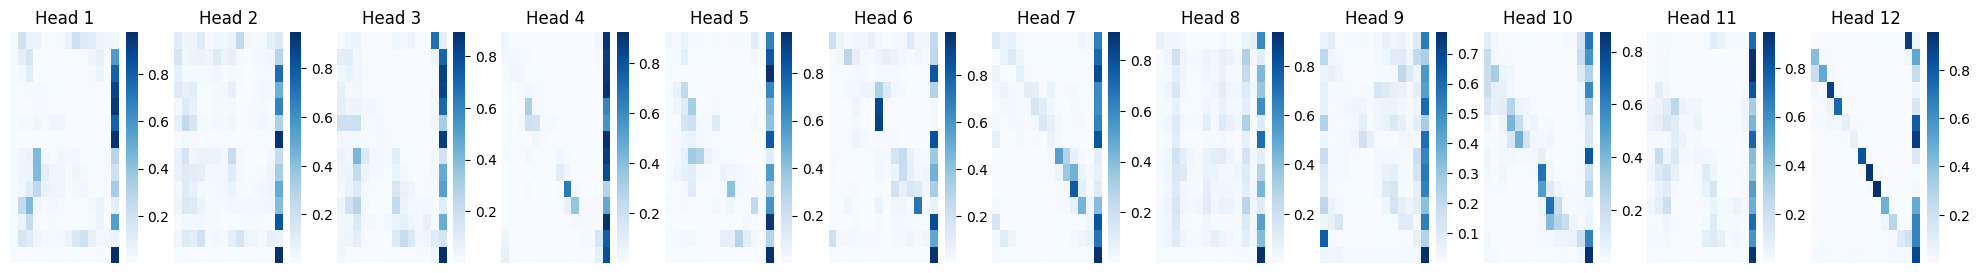

In [63]:
def analyze_multi_head_attention(attention_weights, tokens, model_name, layer_idx=6):
    """
    Анализ того, как разные головы attention фокусируются на разных аспектах
    """

    num_heads = attention_weights[layer_idx].shape[1]

    fig, axs = plt.subplots(1, num_heads, figsize=(25, 3))

    for head in range(num_heads):
        sns.heatmap(attention_weights[layer_idx][0, head].cpu().numpy(), xticklabels=tokens, yticklabels=tokens, ax=axs[head], cmap='Blues')
        axs[head].set_title(f'Head {head+1}')
        axs[head].axis('off')

    plt.show()


# Анализируем multi-head attention для средних слоев
analyze_multi_head_attention(bert_attention, bert_tokens, 'BERT', layer_idx=6)


### Задание 2.2: Создание attention-карт для русскоязычного текста


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


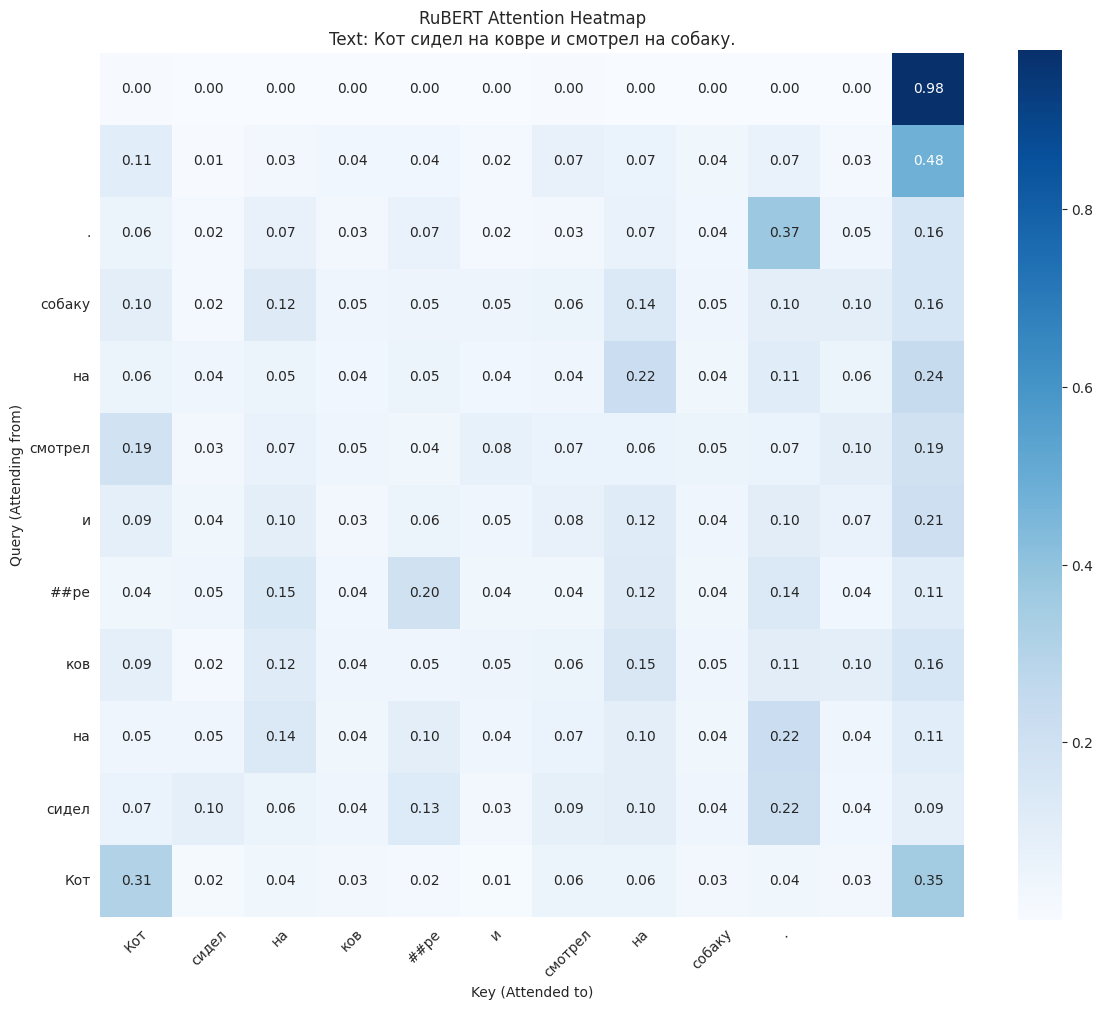


Токены: ['Кот', 'сидел', 'на', 'ков', '##ре', 'и', 'смотрел', 'на', 'собаку', '.']
Количество слоев: 12
Количество голов: 12


In [21]:
# TODO: Загрузите русскоязычную модель и проанализируйте attention для русского текста
# ========= РЕШЕНИЕ: =========
from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем русскоязычную модель
# Напрмимер можно использовать DeepPavlov/rubert-base-cased
ru_tokenizer = AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')
ru_model = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased', output_attentions=True)


# Русский текст для анализа
russian_text = "Кот сидел на ковре и смотрел на собаку."

def analyze_russian_attention(text, tokenizer, model):
    """
    Анализ attention для русского текста
    """
    # Токенизация
    inputs = tokenizer(text, return_tensors='pt')

    with torch.no_grad():
        outputs = model(**inputs)

    attention_weights = outputs.attentions  # список attention для каждого слоя

    tokens = tokenizer.tokenize(text)

    # Создаем heatmap для последнего слоя
    layer = 0
    head = 0
    attention_matrix = attention_weights[layer][0, head].cpu().numpy()

    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(
        attention_matrix,
        xticklabels=tokens,
        yticklabels=tokens,
        cmap='Blues',
        cbar=True,
        square=True,
        annot=True,
        fmt='.2f'
    )

    ax.invert_yaxis()

    plt.title(f'RuBERT Attention Heatmap\nText: {text}')
    plt.xlabel('Key (Attended to)')
    plt.ylabel('Query (Attending from)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return attention_weights, tokens

# Анализируем русский текст
ru_attention, ru_tokens = analyze_russian_attention(russian_text, ru_tokenizer, ru_model)

print(f"\nТокены: {ru_tokens}")
print(f"Количество слоев: {len(ru_attention)}")
print(f"Количество голов: {ru_attention[0].shape[1]}")


## 📈 Итоговый анализ и выводы

### Задание 3: Сравнительный анализ

**TODO: Сделайте итоговые выводы по результатам всех экспериментов:**


1. **Основные различия между BERT и GPT-2:**

   BERT анализирует все токены последовательности, GPT2 анализирует предыдущие токены

2. **Как attention головы специализируются:**

   Каждая голова использует разные варианты распределения внимания на входную последовательность

3. **Особенности русскоязычных моделей:**

   В случае модели DeepPavlov/rubert-base-cased внимание последнего слоя сосредоточено на первом существительном и предлогах

4. **Практические применения полученных знаний:**

   ДЗ поможет выявить точки концентрации внимания моделей
